In [ ]:
!git clone https://github.com/AlmostAPhysicist/qHack.git;
%cd qHack;

[WinError 2] The system cannot find the file specified: 'qHack;'
e:\Programming\Projects\qHack\QuantumRings\qHack


Cloning into 'qHack.git;'...
remote: Repository not found.
fatal: repository 'https://github.com/AlmostAPhysicist/qHack.git;/' not found
e:\Softwares\anaconda3\envs\qHackpy11\Lib\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


In [14]:
pip install QuantumRingsLib;

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install qiskit;

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install qiskit-ibm-runtime;

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.0 MB ? eta -:--:--
   ---------------------------- ----------- 5.8/8.0 MB 29.3 MB/s eta 0:00:01
   ---------------------------------------- 8.0/8.0 MB 24.8 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ---------------------------------------- 2.2/2.2 MB 30.8 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.6 MB ? eta -:--:--
   ---------------------------------------- 2.6/2.6 MB 25.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [6]:
#Once everything is installed, follow https://portal.quantumrings.com/doc/Usage.html
#Login to Quantum Rings and go to "Manage Keys" and copy the following

import QuantumRingsLib
from QuantumRingsLib import QuantumRegister, AncillaRegister, ClassicalRegister, QuantumCircuit
from QuantumRingsLib import QuantumRingsProvider
from QuantumRingsLib import job_monitor
from QuantumRingsLib import JobStatus
from matplotlib import pyplot as plt
import numpy as np

provider = QuantumRingsProvider(
    token='rings-128.YXZRFUMMfK0iaD7TlGMbb9Z2qUh3XrBC',
    name='aryan.malhotra@rutgers.edu'
)
backend = provider.get_backend("scarlet_quantum_rings")

In [7]:
shots = 100

provider.active_account()

{'name': 'aryan.malhotra@rutgers.edu',
 'token': 'rings-128.YXZRFUMMfK0iaD7TlGMbb9Z2qUh3XrBC',
 'max_qubits': '128'}

## Here is a Test For the quantum circuits

In [8]:
def iqft_cct(qc, b, n):
    """
    The inverse QFT circuit

    Args:

        qc (QuantumCircuit):
                The quantum circuit

        b (QuantumRegister):
                The target register

        n (int):
                The number of qubits in the registers to use

    Returns:
        None

    """

    for i in range (n):
        for j in range (1, i+1):
            # for inverse transform, we have to use negative angles
            qc.cu1(  -np.pi / 2** ( i -j + 1 ), b[j - 1], b[i])
        # the H transform should be done after the rotations
        qc.h(b[i])
    qc.barrier()
    return

def plot_histogram (counts, title=""):
    """
    Plots the histogram of the counts

    Args:

        counts (dict):
            The dictionary containing the counts of states

        titles (str):
            A title for the graph.

    Returns:
        None

    """
    fig, ax = plt.subplots(figsize =(10, 7))
    plt.xlabel("States")
    plt.ylabel("Counts")
    mylist = [key for key, val in counts.items() for _ in range(val)]

    unique, inverse = np.unique(mylist, return_inverse=True)
    bin_counts = np.bincount(inverse)

    plt.bar(unique, bin_counts)

    maxFreq = max(counts.values())
    plt.ylim(ymax=np.ceil(maxFreq / 10) * 10 if maxFreq % 10 else maxFreq + 10)
    # Show plot
    plt.title(title)
    plt.show()
    return

Job Running
Job Done.
Ending Job Monitor


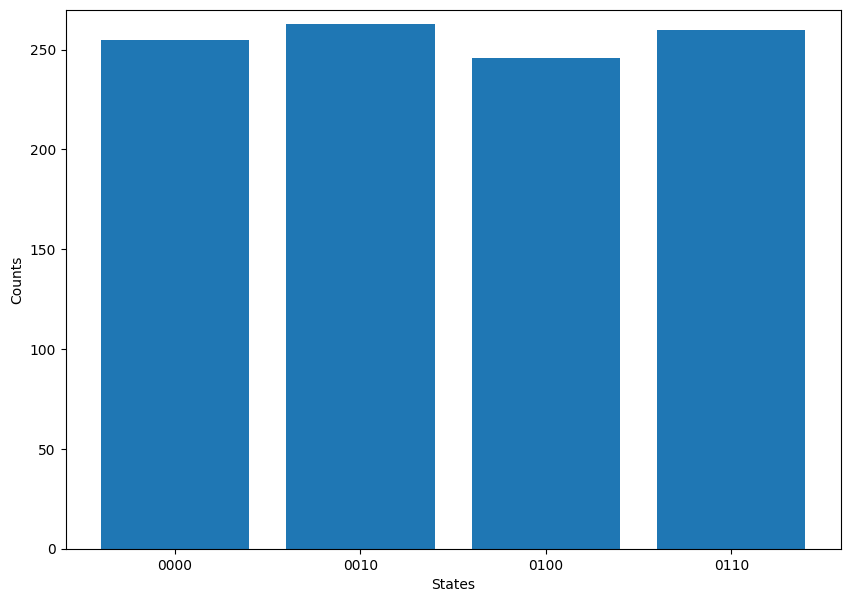

In [9]:
# Shor’s algorithm to factorize 15 using 7^x mod 15.
numberofqubits = 7
shots = 1024


q = QuantumRegister(numberofqubits , 'q')
c = ClassicalRegister(4 , 'c')
qc = QuantumCircuit(q, c)

# Initialize source and target registers
qc.h(0)
qc.h(1)
qc.h(2)
qc.x(6)
qc.barrier()

# Modular exponentiation 7^x mod 15
qc.cx(q[2],q[4] )
qc.cx(q[2],q[5] )
qc.cx(q[6],q[4] )
qc.ccx(q[1],q[5],q[3] )
qc.cx(q[3],q[5] )
qc.ccx(q[1],q[4],q[6] )
qc.cx(q[6],q[4] ) #
qc.barrier()

# IQFT. Refer to implementation from earlier examples
iqft_cct (qc, q, 3)

# Measure
qc.measure(q[0], c[0])
qc.measure(q[1], c[1])
qc.measure(q[2], c[2])

# Execute the circuit
job = backend.run(qc, shots=shots)
job_monitor(job)
result = job.result()
counts = result.get_counts()

#clean up
del q, c, qc
del result
del job

#visualize
plot_histogram(counts)